# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

*Your answer here*

Answer of `A1`: 
+ (0,0)-> -1.5
+ (1,0)-> -0.5
+ (0,1)-> -0.5
+ (1,1)-> 0.5


### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR


*Your answer here*



In [15]:
def perceptron_and(x1, x2):
    # AND: This perception has two inputs. w_1=1, w_2=1, bias=-1.5
    w1, w2, theta = 1, 1, 1.5
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1
    
def perceptron_not(x):
    # NOT: This perception has one input. w=-1, bias=0.5
    w, theta = -1, -0.5
    tmp = x * w
    if tmp <= theta:
        return 0
    else:
        return 1
    
def perceptron_nand(x1, x2):
    # NAND: This perception has two inputs. w_1=-1, w_2=-1, bias=1.5
    w1, w2, theta = -1, -1, -1.5
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1

def perceptron_nor(x1, x2):
    # NOR: Thie perception has two inputs. w_1=-1,w_2=-1, bias=1
    w1, w2, theta = -1, -1, -1
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1
    
# Test
test_units = [(0, 0), (1, 0), (0, 1), (1, 1)]
print("-----AND-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_and(test_unit[0], test_unit[1])}")
    print("**********")
print("-----NOT-----")
for test_unit in [0, 1]:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_not(test_unit)}")
    print("**********")
    
print("-----NAND-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_nand(test_unit[0], test_unit[1])}")
    print("**********")
    
print("-----NOR-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_nor(test_unit[0], test_unit[1])}")
    

-----AND-----
Input: (0, 0)
Output: 0
**********
Input: (1, 0)
Output: 0
**********
Input: (0, 1)
Output: 0
**********
Input: (1, 1)
Output: 1
**********
-----NOT-----
Input: 0
Output: 1
**********
Input: 1
Output: 0
**********
-----NAND-----
Input: (0, 0)
Output: 1
**********
Input: (1, 0)
Output: 1
**********
Input: (0, 1)
Output: 1
**********
Input: (1, 1)
Output: 0
**********
-----NOR-----
Input: (0, 0)
Output: 1
Input: (1, 0)
Output: 0
Input: (0, 1)
Output: 0
Input: (1, 1)
Output: 0


### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


*Your answer here*

In [16]:
# For 2 inputs:
# This question can be simplified as $(X_1 AND X_2) OR (X_1 NOR X_2)$.
# This is equivalent to X_1 XNOR X_2.
# So, this perception needs two layers.

def perceptron_or(x1, x2):
    # OR: This perception has two inputs. w_1=1, w_2=1, bias=-0.5
    w1, w2, theta = 1, 1, 0.5
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1

def perceptron_xnor(x1,x2):
    # This perception has two inputs. w_1=1, w_2=1, bias=-1.5
    # This perception is X_1 AND X_2
    and_result = perceptron_and(x1, x2)
    # This perception has two inputs. w_1=-1, w_2=-1, bias=1
    # This perception is X_1 NOR X_2
    nor_result = perceptron_nor(x1, x2)
    # This perception has two inputs. w_1=1, w_2=1, bias=-1.5
    # This perception is (X_1 AND X_2) OR (X_1 NOR X_2)
    return perceptron_or(and_result, nor_result)

# Test
print("-----Is the number of input 1 even?-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_xnor(test_unit[0], test_unit[1])}")
    print("**********")



# For 3 inputs:
# This is equivalent to (X_1 XNOR X_2 AND NOT X_3) OR (X_1 AND X_2 XNOR X_3) OR (X_1 AND X_3 XNOR X_3)

def is_even_inputs(x1, x2, x3):
    cache1 = perceptron_and(perceptron_xnor(x1, x2), perceptron_not(x3))
    cache2 = perceptron_and(perceptron_xnor(x2, x3), perceptron_not(x1))
    cache3 = perceptron_and(perceptron_xnor(x1, x3), perceptron_not(x2))
    return perceptron_or(perceptron_or(cache1, cache2), cache3)
test_case_3_inputs = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (1, 0, 1), (0, 1, 1), (1, 1, 1)]
print("-----Is the number of input 1 even?-----")
for test_unit in test_case_3_inputs:
    print(f"Input: {test_unit}")
    print(f"Output: {is_even_inputs(test_unit[0], test_unit[1], test_unit[2])}")
    print("**********")
    



-----Is the number of input 1 even?-----
Input: (0, 0)
Output: 1
**********
Input: (1, 0)
Output: 0
**********
Input: (0, 1)
Output: 0
**********
Input: (1, 1)
Output: 1
**********
-----Is the number of input 1 even?-----
Input: (0, 0, 0)
Output: 1
**********
Input: (1, 0, 0)
Output: 0
**********
Input: (0, 1, 0)
Output: 0
**********
Input: (0, 0, 1)
Output: 0
**********
Input: (1, 1, 0)
Output: 1
**********
Input: (1, 0, 1)
Output: 1
**********
Input: (0, 1, 1)
Output: 1
**********
Input: (1, 1, 1)
Output: 0
**********


### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


*Your answer here*


Support vectors are the data points that lie closest to the decision boundary (or hyperplane) in a Support Vector Machine (SVM) model. They are the data points that are most difficult to classify and have a direct bearing on the optimum location of the decision surface.


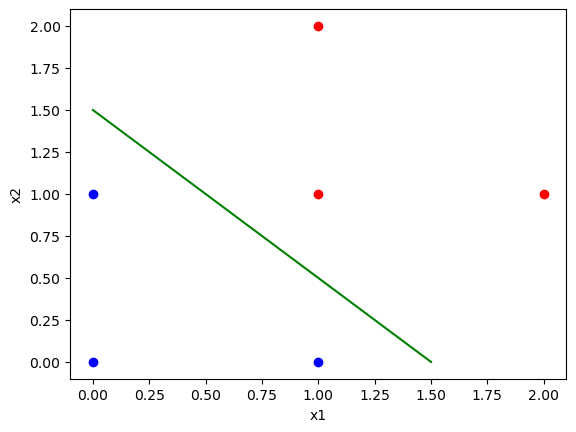

In [17]:
import matplotlib.pyplot as plt
class1 = [(1,1), (1,2), (2,1)]
class2 = [(0,0), (1,0), (0,1)]

plt.scatter([x[0] for x in class1], [x[1] for x in class1], color='red')
plt.scatter([x[0] for x in class2], [x[1] for x in class2], color='blue')
plt.plot([0, 1.5], [1.5, 0], color='green')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()




### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


*Your answer here*
In this case, the sum of probabilities are 1. 

$I_H(t)=-\sum^c_{i=1}p(i|t)\log_2{p(i|t)}$

In this case, $Entropy=-(0.5\times\log_2 0.5 + 0.125\times\log_2 0.125 + 0.125\times\log_2 0.125 + 0.125\times\log_2 0.125)= 2$

Entropy is a measure of uncertainty, the higher the entropy is, the more uncertainty there are.

In [18]:
import math
print(-(0.5*math.log2(0.5) + 4*0.125*math.log2(0.125)))

2.0


### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?





In [19]:
#         [Input1]
#        /       \
#     True      False
#     /           \
# [Input2]       Output=False
#  /     \
# True  False
#  |      |
# Output=True  Output=False

def decision_tree_and(input1, input2):
    if input1:
        if input2:
            return True
        else:
            return False
    else:
        return False
    
    
print("-----DICESION TREE AND-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {decision_tree_and(test_unit[0], test_unit[1])}")
    print("**********")

-----DICESION TREE AND-----
Input: (0, 0)
Output: False
**********
Input: (1, 0)
Output: False
**********
Input: (0, 1)
Output: False
**********
Input: (1, 1)
Output: True
**********


*Your answer here*

The first decision is based on Input1. If Input1 is False, the output is False.
If Input1 is True, the decision tree checks Input2. If Input2 is False, the output is False. If Input2 is True, the output is True.

The decision tree is more interpretable than the perceptron. The perceptron, while less interpretable, can be trained using learning algorithms to adjust its weights and bias based on data, which is not the case with the decision tree. The perceptron is a linear classifier and can only model linearly separable functions. On the other hand, decision trees can model non-linear decision boundaries by adding more levels to the tree. Decision trees can easily handle multi-output problems, while traditional perceptrons are for binary classification problems. However, multi-layer perceptrons (neural networks) can handle multi-output problems.

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


In [134]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd


data = {
    'Height': ['Small', 'Tall', 'Tall', 'Tall', 'Small', 'Tall', 'Tall', 'Small'],
    'Hair': ['Blonde', 'Dark', 'Blonde', 'Dark', 'Dark', 'Red', 'Blonde', 'Blonde'],
    'Eyes': ['Brown', 'Brown', 'Blue', 'Blue', 'Blue', 'Blue', 'Brown', 'Blue'],
    'Attractive': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

df_encoded = df.copy()
for column in df_encoded.columns[:-1]:
    df_encoded[column] = df_encoded[column].astype('category').cat.codes

X = df_encoded[['Height', 'Hair', 'Eyes']]
y = df_encoded['Attractive'].map({'No': 0, 'Yes': 1})

tree_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_classifier.fit(X, y)

tree_rules = export_text(tree_classifier, feature_names=['Height', 'Hair', 'Eyes'])
tree_rules


'|--- Eyes <= 0.50\n|   |--- Hair <= 0.50\n|   |   |--- class: 1\n|   |--- Hair >  0.50\n|   |   |--- Hair <= 1.50\n|   |   |   |--- class: 0\n|   |   |--- Hair >  1.50\n|   |   |   |--- class: 1\n|--- Eyes >  0.50\n|   |--- class: 0\n'

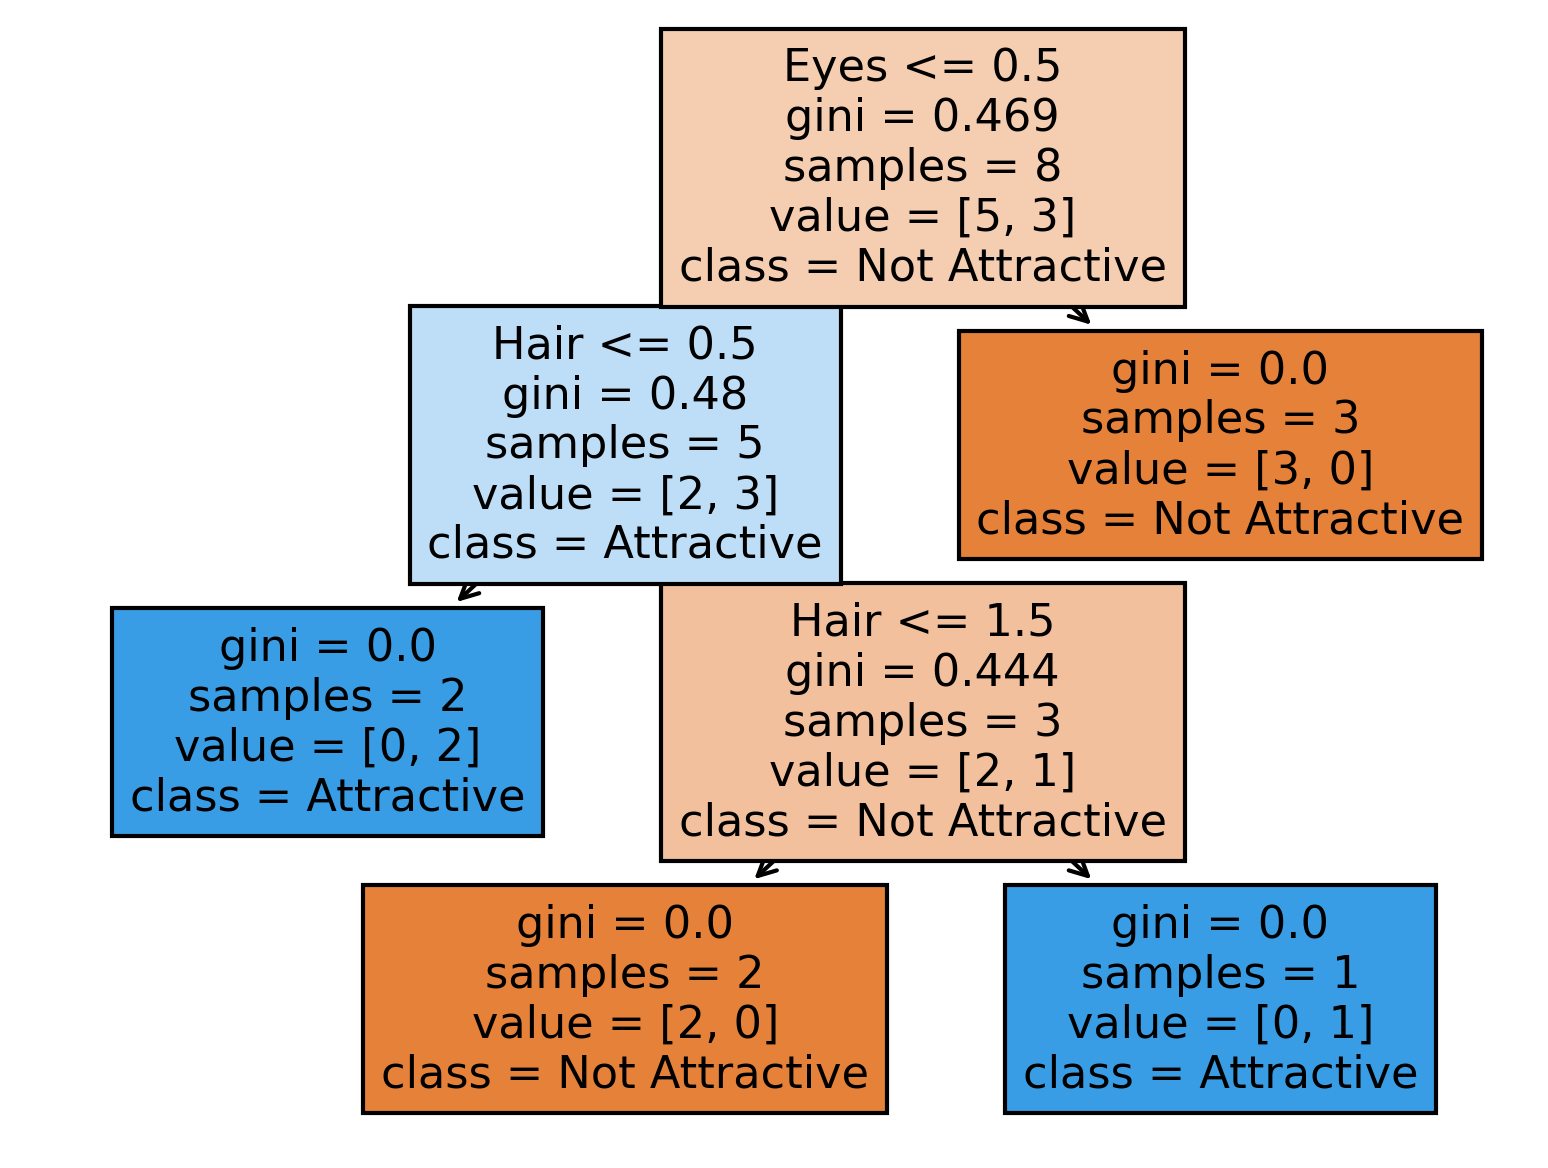

In [133]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure()
plot_tree(tree_classifier, filled=True, feature_names=['Height', 'Hair', 'Eyes'], class_names=['Not Attractive', 'Attractive'])
plt.show()


*Your answer here*

1. If the person's eyes are brown (`Eyes <= 0.50`):
   - If the person has blonde hair (`Hair <= 0.50`), then the person is classified as attractive (`class: 1`).
   - If the person does not have blonde hair:
     - If the person has dark hair (`Hair <= 1.50`), then the person is not attractive (`class: 0`).
     - If the person has red hair (`Hair > 1.50`), then the person is attractive (`class: 1`).

2. If the person's eyes are blue (`Eyes > 0.50`), then the person is not attractive (`class: 0`).



### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

*Your answer here*

1. $o = w_1*x_1+w_2*x_2+w_0 = 0.05*40+1*3.5-6 = -0.5$

    $p = sigmoid(o) = \frac{1}{1+e^{-o}} = 0.3775$

    So the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class is 0.3775.

2. $o = -0.05*h-2.5$
    
    To make $p>0.5, $\frac{1}{1+e^{-o}}>0.5$

    $\frac{1}{1+e^{-0.05*h+2.5}}>=0.5$

    $2 >= 1+e^{-0.05*h+2.5}$

    $1 >= e^{-0.05*h+2.5}$

    $ 0.05*h-2.5 >= 0 $

    $ h>=50 $

    So 50 hours will the student in part 1. need to study to have a 50% chance of getting an A in the class.






In [129]:
import math
1/(1+math.exp(0.5))

0.3775406687981454

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

*Your answer here*

Given the performance metrics, logistic regression is the preferable method for classifying new observations compared to 1-nearest neighbors (1-NN). Although logistic regression exhibits a test error of 30%, suggesting some overfitting, it indicates better generalization than 1-NN, which, while achieving a 0% error on training data, likely suffers from a much higher error on the test data due to overfitting—implied by its average error rate of 18%. This average error rate is misleading as it masks the likely poor performance on unseen data, which is a critical factor in predictive modeling. Consequently, logistic regression, with its more balanced performance between training and test data, emerges as a more reliable and robust choice for classifying new observations.

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


*Your answer here*

When features in a training set exhibit very different scales, algorithms such as K-Nearest Neighbors (K-NN), Support Vector Machines (SVM), and Logistic Regression are particularly sensitive to this issue. K-NN and SVM (using distance-based kernels like the linear or RBF kernel) depend directly on the calculation of distances between data points; hence, a feature with a larger scale can disproportionately influence the model's decisions. Similarly, Logistic Regression, which uses gradient descent for optimization, can suffer from slow convergence or convergence to suboptimal solutions if feature scales are not uniform, as gradients with respect to larger-scaled features can dominate the update steps.

To address issues related to differing scales of features, several preprocessing techniques can be employed. Normalization or Min-Max Scaling adjusts features so that they fall within a specific range, typically [0, 1], which can prevent any single feature from overpowering others in distance-based algorithms. Standardization or Z-score normalization, which rescales data to have zero mean and unit variance, is another method that is particularly useful for algorithms involving optimization, as it ensures that each feature contributes equally to the decision process.

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

*Your answer here*

Primarily, increasing the number of estimators can help as more weak learners will provide more opportunities to correct errors, enhancing the ensemble's ability to capture complex patterns in the data. Additionally, raising the learning rate might allow the model to make more substantial updates with each new weak learner, speeding up the learning process. Adjusting the base estimator’s complexity, especially if decision trees are used, by increasing `max_depth` or decreasing `min_samples_split` and `min_samples_leaf`, can also make the individual learners more sensitive to finer details in the data. Experimenting with these adjustments while monitoring performance through cross-validation is advisable to strike a balance that mitigates underfitting without veering into overfitting.

### A12

What is the benefit of out-of-bag evaluation?

*Your answer here*

Out-of-bag evaluation offers a unique and highly effective method for assessing the performance of ensemble models that use bagging, such as Random Forests, without the need for a separate test or validation dataset. By using data points not included in the training of individual models , OOB evaluation provides an unbiased error estimate similar to what would be achieved with cross-validation. This efficiency allows for all available data to be used in training while simultaneously performing model validation, which is particularly beneficial in data-scarce environments. Additionally, it streamlines the modeling process by reducing the computational cost and complexity associated with separate validation steps, making it a cost-effective solution for model assessment and tuning.

### A13

What is the difference between hard and soft voting classifiers?

*Your answer here*

In ensemble learning, hard and soft voting classifiers represent two different methods of aggregating the predictions from a group of individual classifiers to form a final output classification. Hard voting counts the most frequent prediction from the classifiers as the final prediction, essentially using a majority rule without considering the confidence of each classifier's prediction. Soft voting, by contrast, leverages the probability estimates for each class provided by the classifiers, typically averaging these probabilities to determine the final prediction. This method can weigh votes based on the confidence of each classifier, potentially leading to more accurate predictions, especially when some classifiers are more reliable than others. Thus, while hard voting focuses strictly on the most common outcome, soft voting provides a nuanced approach that considers both the outcome and the certainty of each classifier's decision.


## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

### B1
Consider the following Perceptron code.

In [108]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [109]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


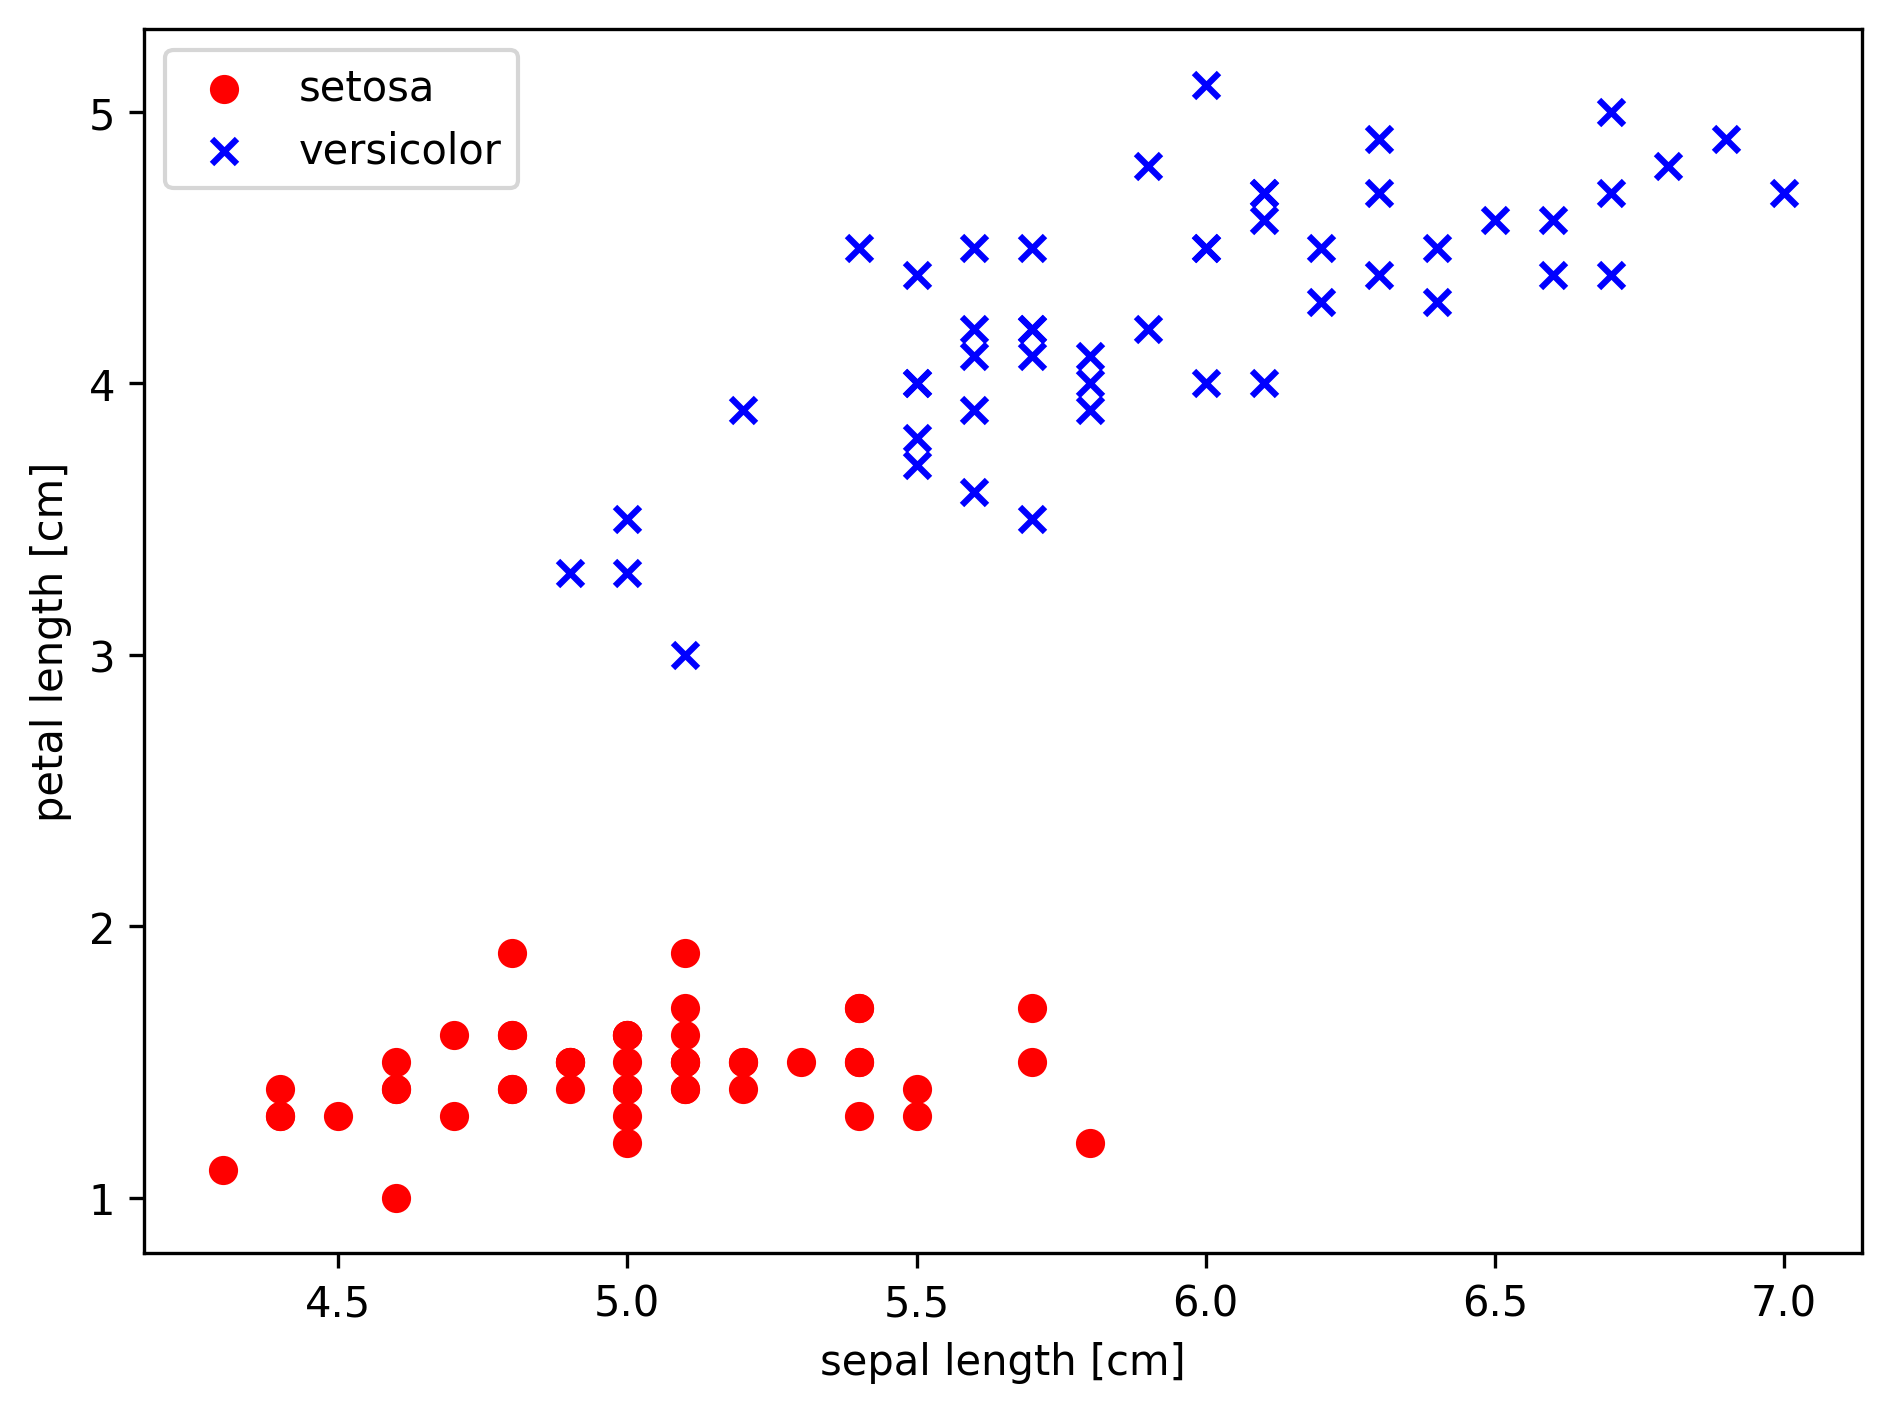

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [111]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [112]:
from matplotlib.colors import ListedColormap

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [113]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    # x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    x1_interval = [0, X[:, 0].max()+2]
    # x2_interval = [X[:, 1].min() - 1, X[:, 1].max() + 1]
    a = -classifier.w_[1]/classifier.w_[2]
    b = -classifier.w_[0]/classifier.w_[2]
    x2_interval = [a*x1_interval[0] + b, a*x1_interval[1] + b]
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

C:\Users\10536\AppData\Local\Temp\ipykernel_10836\449223450.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


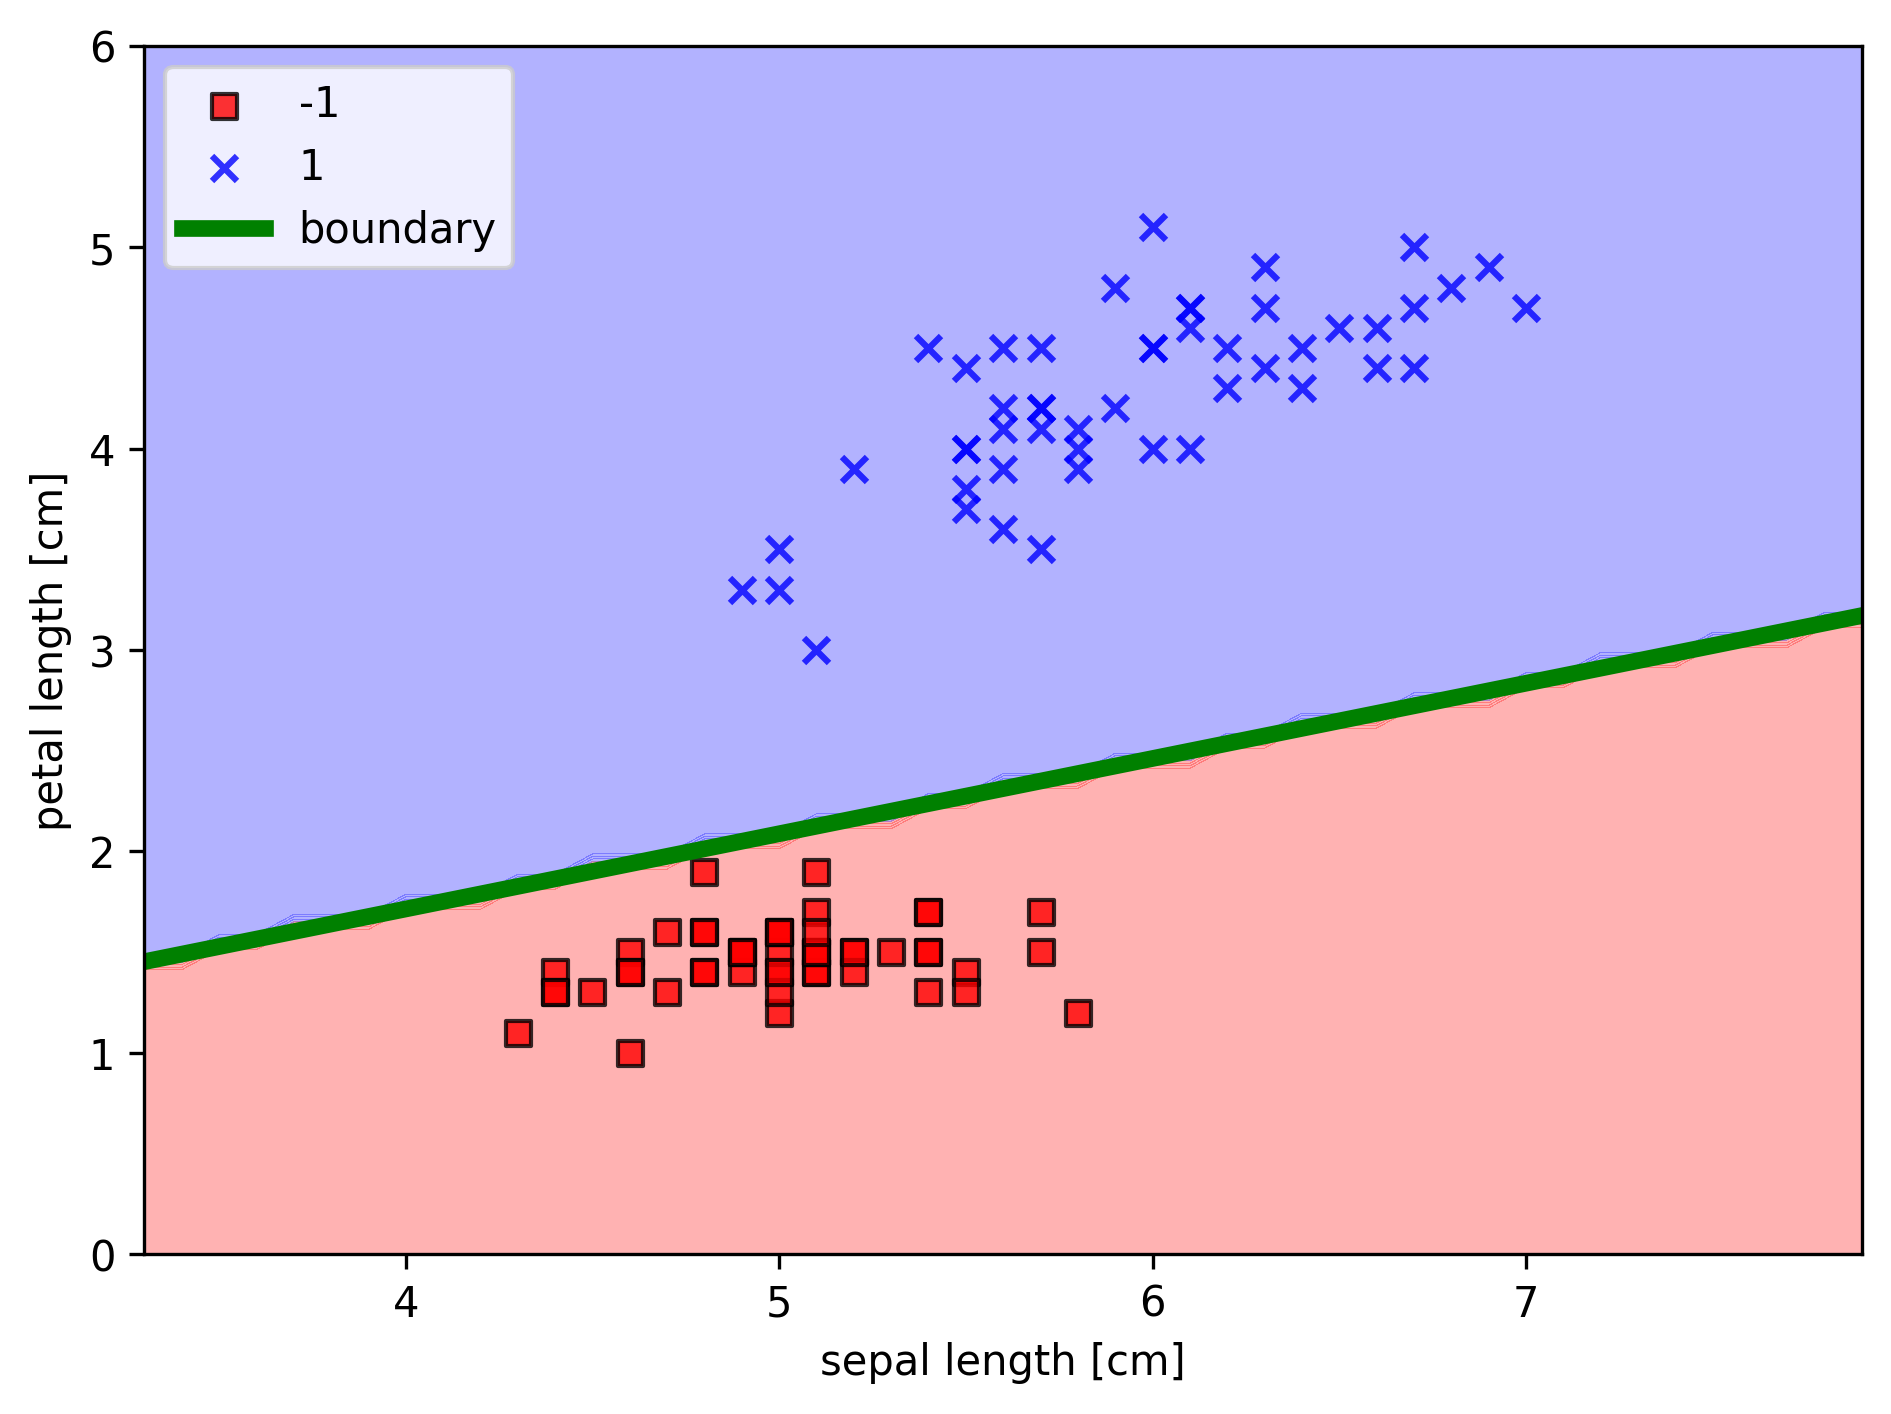

In [114]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [115]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


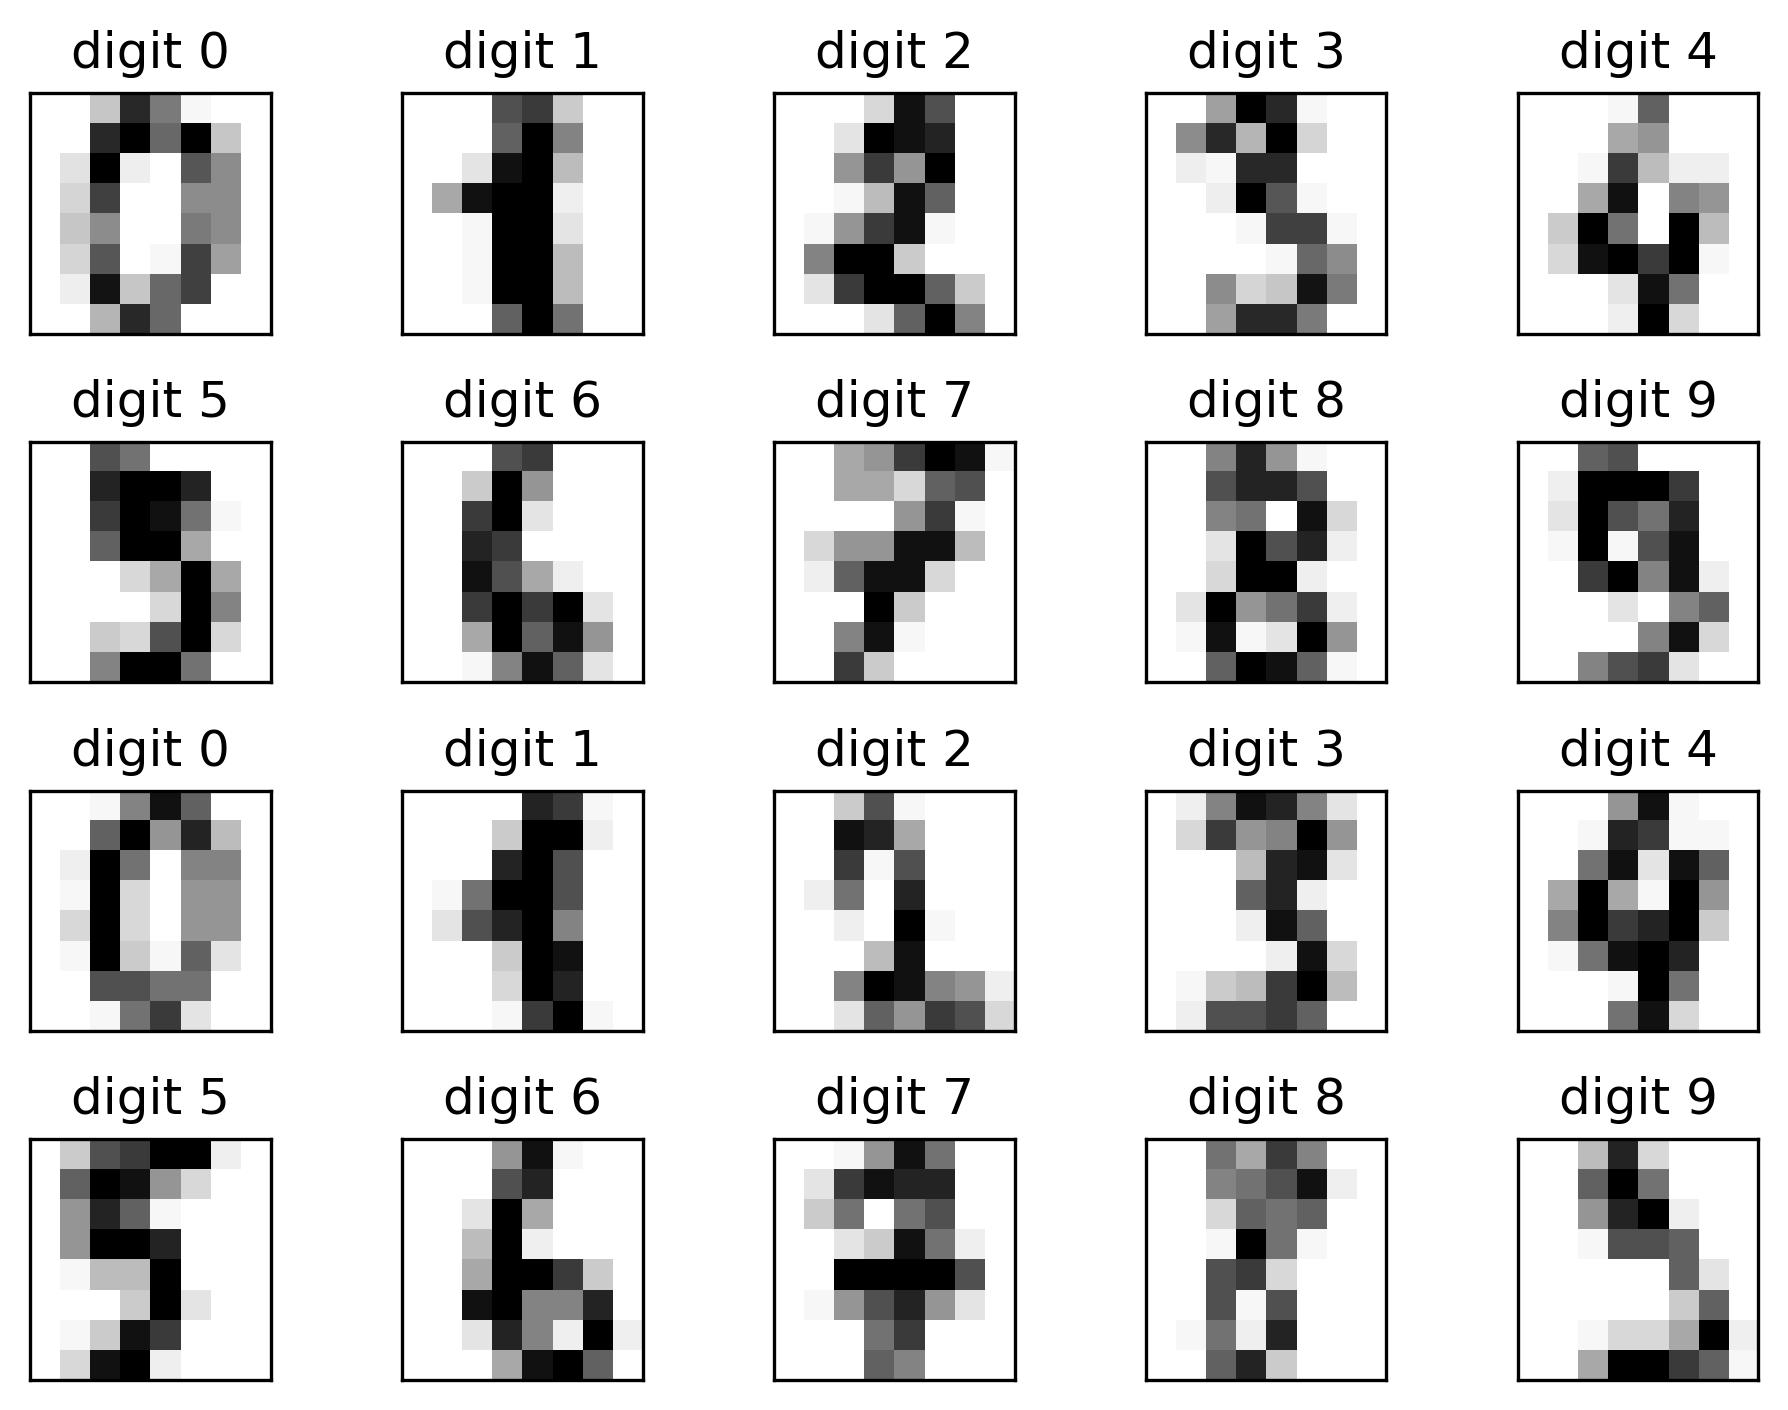

In [116]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [117]:
#Your code here
from sklearn.model_selection import train_test_split
split_rate = [0.6, 0.2, 0.2]
# train_size = int(digits.data.shape[0]*split_rate[0])
# val_size = int(digits.data.shape[0]*split_rate[1])
# X_train = digits.data[:train_size]
# y_train = digits.target[:train_size]
# X_val = digits.data[train_size:train_size+val_size]
# y_val = digits.target[train_size:train_size+val_size]
# X_test = digits.data[train_size+val_size:]
# y_test = digits.target[train_size+val_size:]


X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1, stratify=y)

Classifier #1 Perceptron

In [118]:
#Your code, including traing and testing, to observe the accuracies.

class DigitPerceptron():
    def __init__(self, class_num):
        self.perceptrons = [Perceptron(eta=0.1, n_iter=40) for _ in range(class_num)]
    def fit(self, X, y):
        for idx, perceptron in enumerate(self.perceptrons):
            y_ = np.where(y == idx, 1, -1)
            perceptron.fit(X, y_)
    def predict(self, X):
        result = []
        for perceptron in self.perceptrons:
            result.append(perceptron.net_input(X))
        return np.argmax(result, axis=0)
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
dp = DigitPerceptron(10)
dp.fit(X_train, y_train)
print("Train accuracy: ", dp.score(X_train, y_train))
# print("Validation accuracy: ", dp.score(X_val, y_val))
print("Test accuracy: ", dp.score(X_test, y_test))

        
        
    


Train accuracy:  0.9697692919649961
Test accuracy:  0.937037037037037


In [119]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron as skPerceptron
ppn = skPerceptron()
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, ppn.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))



Train Accuracy:  0.979315831344471
Test Accuracy:  0.9444444444444444


Classifier #2 Logistic Regression

In [122]:
#Your code, including traing and testing, to observe the accuracies.
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))
class LogisticRegression():
    def __init__(self, eta=0.01, n_iter=20) -> None:
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        rgen = np.random.RandomState(42)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost = []
        for i in range(self.n_iter):
            o = self.sigmoid(self.net_input(X))
            errors = (y - o)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = -y.dot(np.log(o)) - ((1 - y).dot(np.log(1 - o)))
            self.cost.append(cost)
        return self
    def sigmoid(self, o):
        # return 1./(1.+np.exp(o))
        return 1. / (1. + np.exp(-np.clip(o, -250, 250)))
        
    def net_input(self, X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(np.dot(X,self.w_)>=0,1,0)


class DigitLogisticRegression():
    def __init__(self, class_num):
        self.regressions = [LogisticRegression() for i in range(class_num)]
    def fit(self,X,y):
        for idx, regression in enumerate(self.regressions):
            y_ = np.where(y==idx,1,-1)
            regression.fit(X,y_)
    def predict(self, X):
        result = []
        for regression in self.regressions:
            result.append(regression.net_input(X))
        return np.argmax(result, axis=0)
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

dlr = DigitLogisticRegression(10)
dlr.fit(X_train,y_train)

print("Train accuracy: ", dlr.score(X_train,y_train))

print("Test accuracy: ", dlr.score(X_test, y_test))
        
        


Train accuracy:  0.8782816229116945
Test accuracy:  0.8907407407407407


In [123]:
from sklearn.linear_model import LogisticRegression as skLogisticRegression
lr = skLogisticRegression(C=100.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train, y_train)

print("Train accuracy: ", lr.score(X_train, y_train))
print("Test accuracy: ", lr.score(X_test, y_test))

Train accuracy:  1.0
Test accuracy:  0.9407407407407408


Classifier #3 SVM

In [124]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC
scv = SVC()
scv.fit(X_train,y_train)
print(accuracy_score(scv.predict(X_train),y_train))
print(accuracy_score(scv.predict(X_test),y_test))    


0.9960222752585521
0.9833333333333333


Classifier #4 Decision Tree

In [125]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print(accuracy_score(dtc.predict(X_train),y_train))
print(accuracy_score(dtc.predict(X_test),y_test))    

1.0
0.8481481481481481


Classifer #5 Random Forest

In [126]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(accuracy_score(rfc.predict(X_train),y_train))
print(accuracy_score(rfc.predict(X_test),y_test))  

1.0
0.9703703703703703


Classifier #6 KNN

In [127]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
print(accuracy_score(knc.predict(X_train),y_train))
print(accuracy_score(knc.predict(X_test),y_test))  


0.9912490055688147
0.9833333333333333


#### Analysis
In the begining, two algorithms Perceptron and Logistic Regression was impelented by myself, and compared with the same algorithms in sklearn lib.

All the accuracy scores on the training set are high, so I compared the accuracy scores on the test set.

| | My Implement | sklearn |
|-|--------|--------|
|Perceptron|0.937|0.944|
|Logistic Regression |0.891|0.983|

I think I have achieved a relatively good score, but SK Learn is still better. So in the Next part I will analyse the performance of different algorithms using sklearn.




| Algorithm           | Training Set | Test Set |
|---------------------|--------------|---------|
| Perceptron          | 0.970        | 0.944   |
| Logistic Regression | 1.0       | 0.941   |
| SVM                 | 0.996             | 0.983        |
| Decision Tree       | 1.0             |  0.848       |
| Random Forest       | 1.0             |  0.970       |
| KNN                 | 0.991             | 0.983        |


As can be seen from the table:
+ The best performing classifiers on the test set are the Support Vector Machine (SVM) and K-Nearest Neighbors (KNN), both with an accuracy score of 0.983.
+ The worst performing classifier on the test set is the Decision Tree, with an accuracy score of 0.848.

The performance of these classifiers can be attributed to their underlying mechanisms:

+ SVM and KNN are performing well possibly because they are capable of handling high dimensional data like the Iris dataset effectively. SVM finds the optimal hyperplane that separates the classes, while KNN classifies based on the majority class of nearest neighbors.
+ On the other hand, Decision Trees might be performing poorly due to overfitting. As we can see, it has a perfect score of 1.0 on the training set but a much lower score on the test set. This suggests that the model may have memorized the training data and failed to generalize well to unseen data.






### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [41]:
#Your answer here
import os
import email
import email.policy
def parse_email(file):
    with open(file, 'rb') as f:
        return email.parser.BytesParser(policy = email.policy.default).parse(f)
    
easy_ham = [parse_email(os.path.join('data', 'easy_ham', file)) for file in os.listdir(os.path.join('data', 'easy_ham'))]
easy_ham_2 = [parse_email(os.path.join('data', 'easy_ham_2', file)) for file in os.listdir(os.path.join('data', 'easy_ham_2'))]
hard_ham = [parse_email(os.path.join('data', 'hard_ham', file)) for file in os.listdir(os.path.join('data', 'hard_ham'))]
spam = [parse_email(os.path.join('data', 'spam', file)) for file in os.listdir(os.path.join('data', 'spam'))]
spam_2 = [parse_email(os.path.join('data', 'spam_2', file)) for file in os.listdir(os.path.join('data', 'spam_2'))]
    

In [42]:
len(easy_ham), len(easy_ham_2), len(hard_ham), len(spam), len(spam_2)

(2501, 1401, 251, 501, 1397)

In [50]:
easy_ham[0].items()




[('Return-Path', '<exmh-workers-admin@spamassassin.taint.org>'),
 ('Delivered-To', 'zzzz@localhost.netnoteinc.com'),
 ('Received',
  'from localhost (localhost [127.0.0.1])\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)'),
 ('Received',
  'from phobos [127.0.0.1]\tby localhost with IMAP (fetchmail-5.9.0)\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)'),
 ('Received',
  'from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100'),
 ('Received',
  'from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002    07:35:02 -0400 (EDT)'),
 ('Delivered-To', 'exmh-workers@listman.spamassassin.taint.org'),
 ('Received',
  'from int-mx

In [68]:
easy_ham[0].get_content()

'    Date:        Wed, 21 Aug 2002 10:54:46 -0500\n    From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\n    Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n  | I can\'t reproduce this error.\n\nFor me it is very repeatable... (like every time, without fail).\n\nThis is the debug log of the pick happening ...\n\n18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury}\n18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury\n18:19:04 Ftoc_PickMsgs {{1 hit}}\n18:19:04 Marking 1 hits\n18:19:04 tkerror: syntax error in expression "int ...\n\nNote, if I run the pick command by hand ...\n\ndelta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury\n1 hit\n\nThat\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m\nusing is ...\n\ndelta$ pick -version\npick -- nmh-1.0.4 [compiled on fuchsia.c

In [57]:
ham_mails = easy_ham + easy_ham_2 + hard_ham
spam_mails = spam + spam_2


In [69]:
def email_to_plain(email):
    payload = email.get_payload()
    if isinstance(payload, list):
        return '\n'.join([email_to_plain(sub_email) for sub_email in payload])
    else:
        return payload


In [70]:
for mail in ham_mails:
    if type(mail.get_payload()) != str:
        # print(type(mail.get_payload()))
        print(email_to_plain(mail))
        break
        

> From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>
> Date:  Wed, 21 Aug 2002 10:40:39 -0500
>
> > From:  Chris Garrigues <cwg-exmh@DeepEddy.Com>
> > Date:  Wed, 21 Aug 2002 10:17:45 -0500
> >
> > Ouch...I'll get right on it.
> > 
> > > From:  Robert Elz <kre@munnari.OZ.AU>
> > > Date:  Wed, 21 Aug 2002 19:30:01 +0700
> > >
> > > Any chance of having that lengthen instead?   I like all my exmh stuff
> > > in nice columns (fits the display better).   That is, I use the detache
> d
> > > folder list, one column.   The main exmh window takes up full screen,
> > > top to bottom, but less than half the width, etc...
> 
> I thought about that.  The first order approximation would be to just add 
> using pack .... -side top instead of pack ... -side left, however, since their 
> each a different width, it would look funny.

I've done this.  It's not as pretty as I think it should be, but it works.  
I'm going to leave the cosmetic issues to others.  When I update the 
documentation, I'll add thi

In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\10536\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [72]:
X_raw = ham_mails + spam_mails

In [75]:
X_content = [email_to_plain(mail) for mail in ham_mails + spam_mails]

In [76]:
import re
from html import unescape
def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>',' ',html,flags = re.M | re.S | re.I)
    text = re.sub('<a\s.*?>','HYPERLINK ',text,flags = re.M | re.S | re.I)
    text = re.sub('<.*?>',' ',text,flags = re.M | re.S)
    text = re.sub(r'(\s*\n)+','\n',text,flags = re.M | re.S)
    return unescape(text)

In [77]:
for idx, content in enumerate(X_content):
    if X_raw[idx].get_content_type() == 'text/html':
        X_content[idx] = html_to_plain_text(content)
        print(X_content[idx])


It took me a week to get down to this;
The towering pine and the hemlock.
HYPERLINK http://www.informationweek.com/story/IWK20020723S0005
http://xent.com/mailman/listinfo/fork


				  
					HYPERLINK HYPERLINK Apparently  the NY Mets couldn't find a way to compromise with some of the team's most dedicated fans. A sad day for New York baseball. What would Mookie say?? HYPERLINK
HYPERLINK HYPERLINK Salon : "Listen's $10-per-month Rhapsody service has a fantastic interface, and, since it has content from all five labels, you can find much of what you'd like on it. You can listen to any song as often as you'd like -- an option that gives a taste of what a perfect subscription service would feel like. The only trouble is, Listen won't let you burn -- and, as one file trader asked, 'Who wants to be stuck listening to shit at their computer?'"  HYPERLINK
HYPERLINK HYPERLINK Martin Schwimmer , a trademark attorney and Mets fan, weighs in on Bryan Hoch's MetsOnline HYPERLINK situation . HYPERL

In [80]:
word_dict = {"<UNK>":0}
def get_words(mail):
    words = nltk.word_tokenize(mail)
    for word in words:
        if word not in word_dict:
            word_dict[word] = len(word_dict)
    return [word_dict[word] for word in words]




In [81]:
for mail in X_content:
    get_words(mail)

In [84]:
len(word_dict)

140939

In [85]:
word_count = {word:0 for word in word_dict}
for mail in X_content:
    words = nltk.word_tokenize(mail)
    for word in words:
        word_count[word] += 1


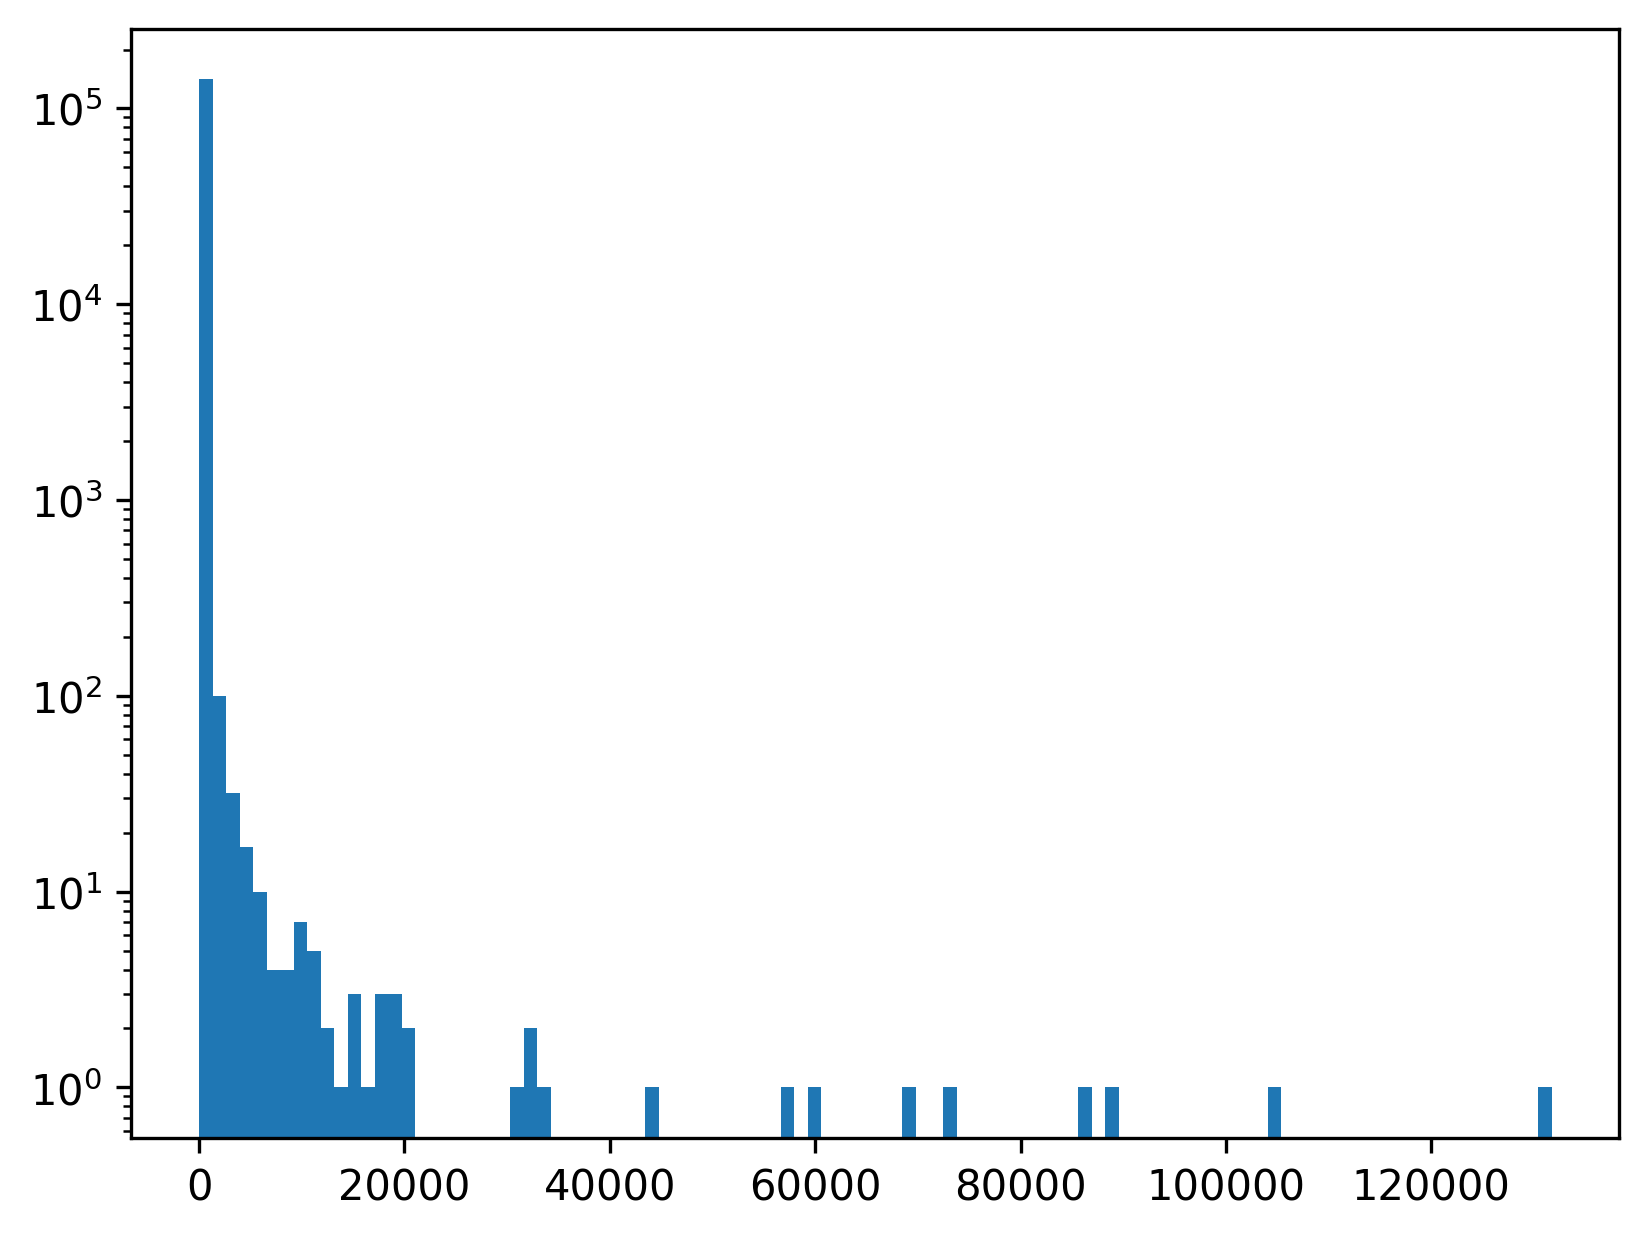

In [89]:
# 画出word_count的直方图

import matplotlib.pyplot as plt
plt.hist(word_count.values(), bins=100, log=True)
plt.show()


In [92]:
# 丢弃出现次数少于10次的单词
new_word_dict = {k:v for k,v in word_dict.items() if word_count[k] >= 100}

In [93]:
len(new_word_dict)

2333

In [94]:
# 重新编码
new_word_dict = {k:v for k,v in zip(new_word_dict.keys(), range(len(new_word_dict)))}


In [95]:
new_word_dict["<UNK>"] = len(new_word_dict)


In [96]:
def embed(mail):
    words = nltk.word_tokenize(mail)
    embedding = [0 for _ in range(len(new_word_dict))]
    for word in words:
        if word in new_word_dict:
            embedding[new_word_dict[word]] += 1
        else:
            embedding[new_word_dict["<UNK>"]] += 1
    return embedding

In [100]:
X_embedded = [embed(mail) for mail in X_content]
y = [0 for _ in range(len(ham_mails))] + [1 for _ in range(len(spam_mails))]

X_train, X_test, y_train, y_test = train_test_split(X_embedded, y, test_size=0.3, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [102]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
print("Train accuracy: ", lr.score(X_train_scaled, y_train))
print("Test accuracy: ", lr.score(X_test_scaled, y_test))

Train accuracy:  0.9992916174734356
Test accuracy:  0.9752202643171806


In [103]:
# SVM, Decision Tree, Random Forest, KNN, Perceptron, MLP
from sklearn.svm import SVC
scv = SVC()
scv.fit(X_train_scaled, y_train)
print("-------------SVM-------------")
print("Train accuracy: ", accuracy_score(scv.predict(X_train_scaled), y_train))
print("Test accuracy: ", accuracy_score(scv.predict(X_test_scaled), y_test))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
print("-------------Decision Tree-------------")
print("Train accuracy: ", accuracy_score(dtc.predict(X_train_scaled), y_train))
print("Test accuracy: ", accuracy_score(dtc.predict(X_test_scaled), y_test))

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
print("-------------Random Forest-------------")
print("Train accuracy: ", accuracy_score(rfc.predict(X_train_scaled), y_train))
print("Test accuracy: ", accuracy_score(rfc.predict(X_test_scaled), y_test))

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train_scaled, y_train)
print("-------------KNN-------------")
print("Train accuracy: ", accuracy_score(knc.predict(X_train_scaled), y_train))
print("Test accuracy: ", accuracy_score(knc.predict(X_test_scaled), y_test))

from sklearn.linear_model import Perceptron
ppn = Perceptron()
ppn.fit(X_train_scaled, y_train)
print("-------------Perceptron-------------")
print("Train accuracy: ", accuracy_score(ppn.predict(X_train_scaled), y_train))
print("Test accuracy: ", accuracy_score(ppn.predict(X_test_scaled), y_test))

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
print("-------------MLP-------------")
print("Train accuracy: ", accuracy_score(mlp.predict(X_train_scaled), y_train))
print("Test accuracy: ", accuracy_score(mlp.predict(X_test_scaled), y_test))

-------------SVM-------------
Train accuracy:  0.969775678866588
Test accuracy:  0.9405286343612335
-------------Decision Tree-------------
Train accuracy:  1.0
Test accuracy:  0.9366740088105727
-------------Random Forest-------------
Train accuracy:  1.0
Test accuracy:  0.9807268722466961
-------------KNN-------------
Train accuracy:  0.9097992916174734
Test accuracy:  0.8689427312775331
-------------Perceptron-------------
Train accuracy:  0.9995277449822905
Test accuracy:  0.9708149779735683
-------------MLP-------------
Train accuracy:  0.9995277449822905
Test accuracy:  0.9724669603524229
